# Tumor Diagnosis: Exploratory Data Analysis

### About the Dataset:

The [Breast Cancer Diagnostic data](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) is available on the UCI Machine Learning Repository. This database is also available through the [UW CS ftp server](http://ftp.cs.wisc.edu/math-prog/cpo-dataset/machine-learn/cancer/WDBC/).

**Attribute Information**:

- ID number
- Diagnosis (M = malignant, B = benign)

Ten real-valued features are computed for each cell nucleus:

1. radius (mean of distances from center to points on the perimeter) 
2. texture (standard deviation of gray-scale values) 
3. perimeter 
4. area 
5. smoothness (local variation in radius lengths) 
6. compactness (perimeter^2 / area - 1.0) 
7. concavity (severity of concave portions of the contour) 
8. concave points (number of concave portions of the contour)
9. symmetry
10. fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [3]:
!pip install matplotlib==3.1.0

  Using cached matplotlib-3.1.0.tar.gz (37.2 MB)
  ERROR: Command errored out with exit status 1:
   command: /Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/bd/xxgvq_zd0xq5cr52dkynl_dr0000gn/T/pip-install-l3wbzy32/matplotlib_251f695e8b484c159d7fbf3e69f2985c/setup.py'"'"'; __file__='"'"'/private/var/folders/bd/xxgvq_zd0xq5cr52dkynl_dr0000gn/T/pip-install-l3wbzy32/matplotlib_251f695e8b484c159d7fbf3e69f2985c/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /private/var/folders/bd/xxgvq_zd0xq5cr52dkynl_dr0000gn/T/pip-wheel-mk6ypr3n
       cwd: /private/var/folders/bd/xxgvq_zd0xq5cr52dkynl_dr0000gn/T/pip-install-l3wbzy32/matplotlib_251f695e8b484c159d7fbf

Failed to build matplotlib
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
    Running setup.py install for matplotlib ... error
    ERROR: Command errored out with exit status 1:
     command: /Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/bd/xxgvq_zd0xq5cr52dkynl_dr0000gn/T/pip-install-l3wbzy32/matplotlib_251f695e8b484c159d7fbf3e69f2985c/setup.py'"'"'; __file__='"'"'/private/var/folders/bd/xxgvq_zd0xq5cr52dkynl_dr0000gn/T/pip-install-l3wbzy32/matplotlib_251f695e8b484c159d7fbf3e69f2985c/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --

### Loading Libraries and Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics, preprocessing, svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from math import sqrt
import os, sys, itertools, re
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
%matplotlib inline
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,classification_report,precision_score, recall_score, roc_curve, precision_recall_curve 

In [ ]:
if 'google.colab' in sys.modules:    
    project_path = "/content/drive/My Drive/"
    # Google Colab lib
    from google.colab import drive
    # Mount the drive
    drive.mount('/content/drive/', force_remount=True)
    sys.path.append(project_path)
    %cd $project_path


Mounted at /content/drive/
/content/drive/My Drive


In [ ]:
data = pd.read_csv('data.csv')

## Exploratory Data Analysis

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
data.shape# Shape detemines how many rows and how many columns are there

(569, 33)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
df_skew = pd.DataFrame(data={
    'skewness': data.skew()
})

df_skew

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,skewness
id,6.473752
radius_mean,0.942380
texture_mean,0.650450
perimeter_mean,0.990650
area_mean,1.645732
smoothness_mean,0.456324
compactness_mean,1.190123
concavity_mean,1.401180
concave points_mean,1.171180
symmetry_mean,0.725609


In [ ]:
# feature names as a list
col = data.columns 
print(col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [ ]:
feature_cols = ["radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst",]

In [ ]:
# y includes our labels and x includes our features
data.diagnosis=data.diagnosis.map({'M':1,'B':0})
y = data.diagnosis
list = ['Unnamed: 32','id','diagnosis']
x = data.drop(list,axis = 1 )
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#menghitung variabel diagnosis
data.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

In [ ]:
import seaborn as sns

### Plot Diagnosis Distributions

Number of Benign:  357
Number of Malignant :  212


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


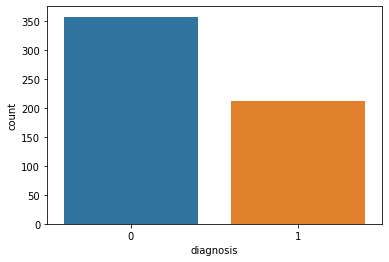

In [ ]:
ax = sns.countplot(y,label="Count")
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

In [ ]:
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Data Visualization

### Visualizing Standardized Data with Seaborn

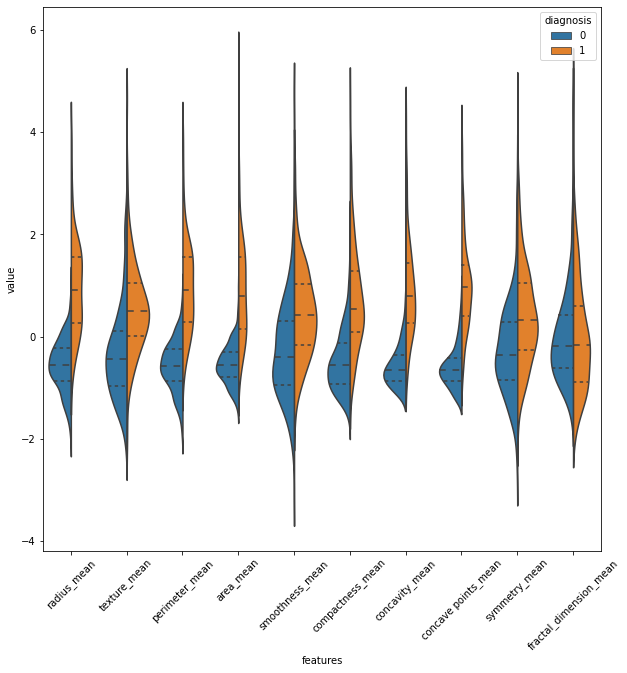

In [ ]:
# first ten features
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=45);

### Violin Plots and Box Plots

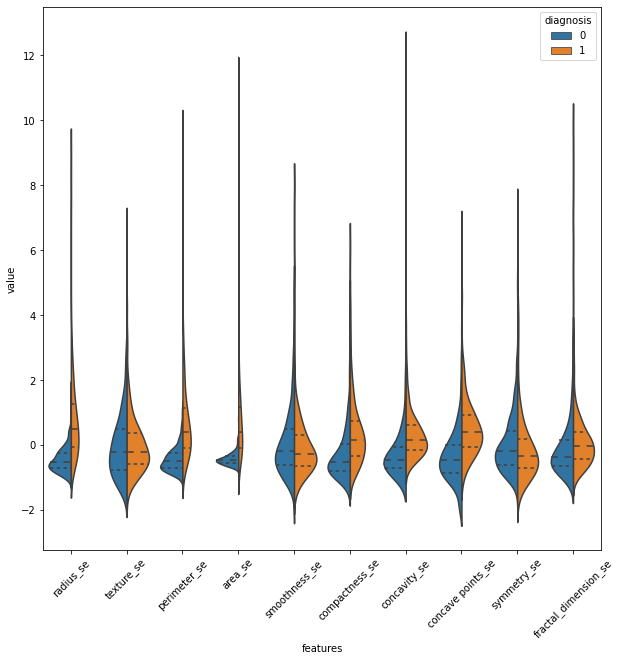

In [ ]:
# Second ten features
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=45);

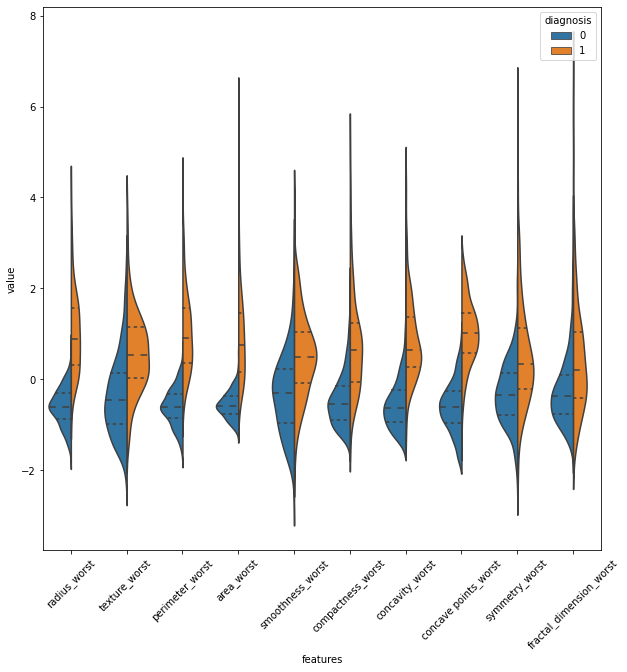

In [ ]:
# Third ten features
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=45);

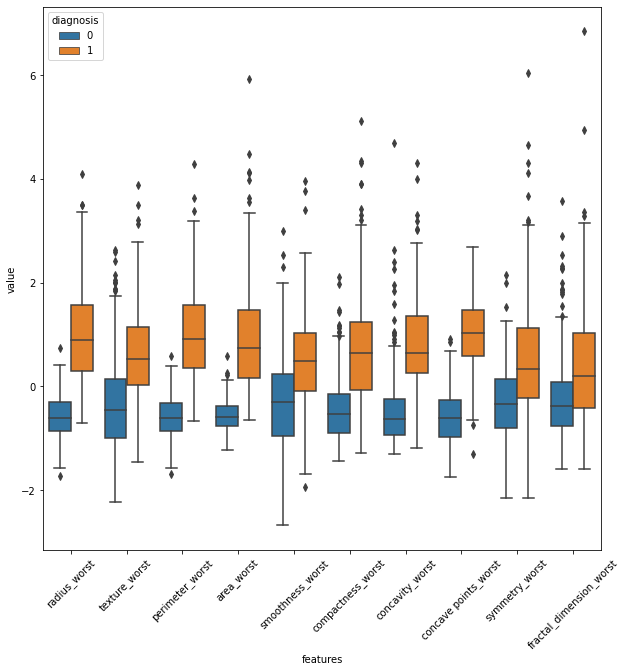

In [ ]:
# As an alternative of violin plot, box plot can be used
# box plots are also useful in terms of seeing outliers
# I do not visualize all features with box plot
# In order to show you lets have an example of box plot
# If you want, you can visualize other features as well.
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=45);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


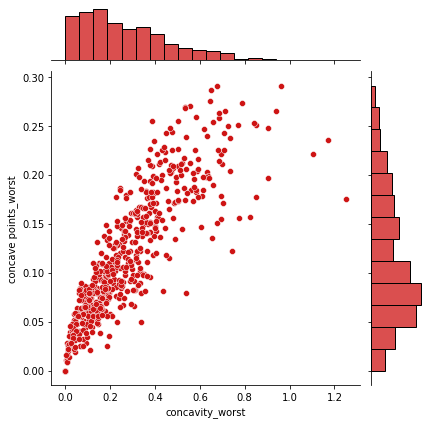

In [ ]:
sns.jointplot(x.loc[:,'concavity_worst'],
              x.loc[:,'concave points_worst'],
              kind="scatter",
              color="#ce1414");

### Uncovering Correlated Features with Pair Grids

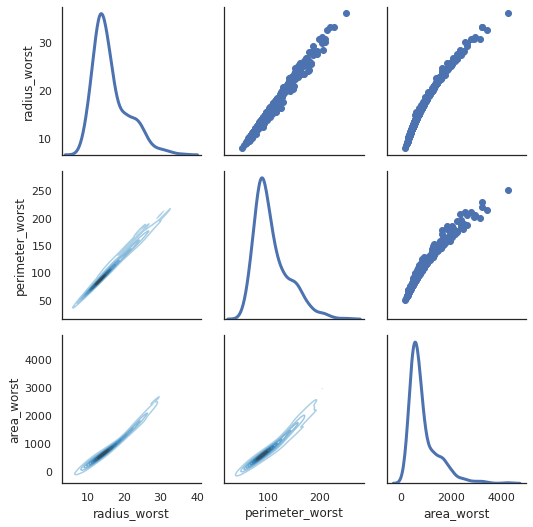

In [ ]:
sns.set(style="white")
df = x.loc[:,['radius_worst','perimeter_worst','area_worst']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3);

### Observing the Distribution of Values and their Variance with Swarm Plots

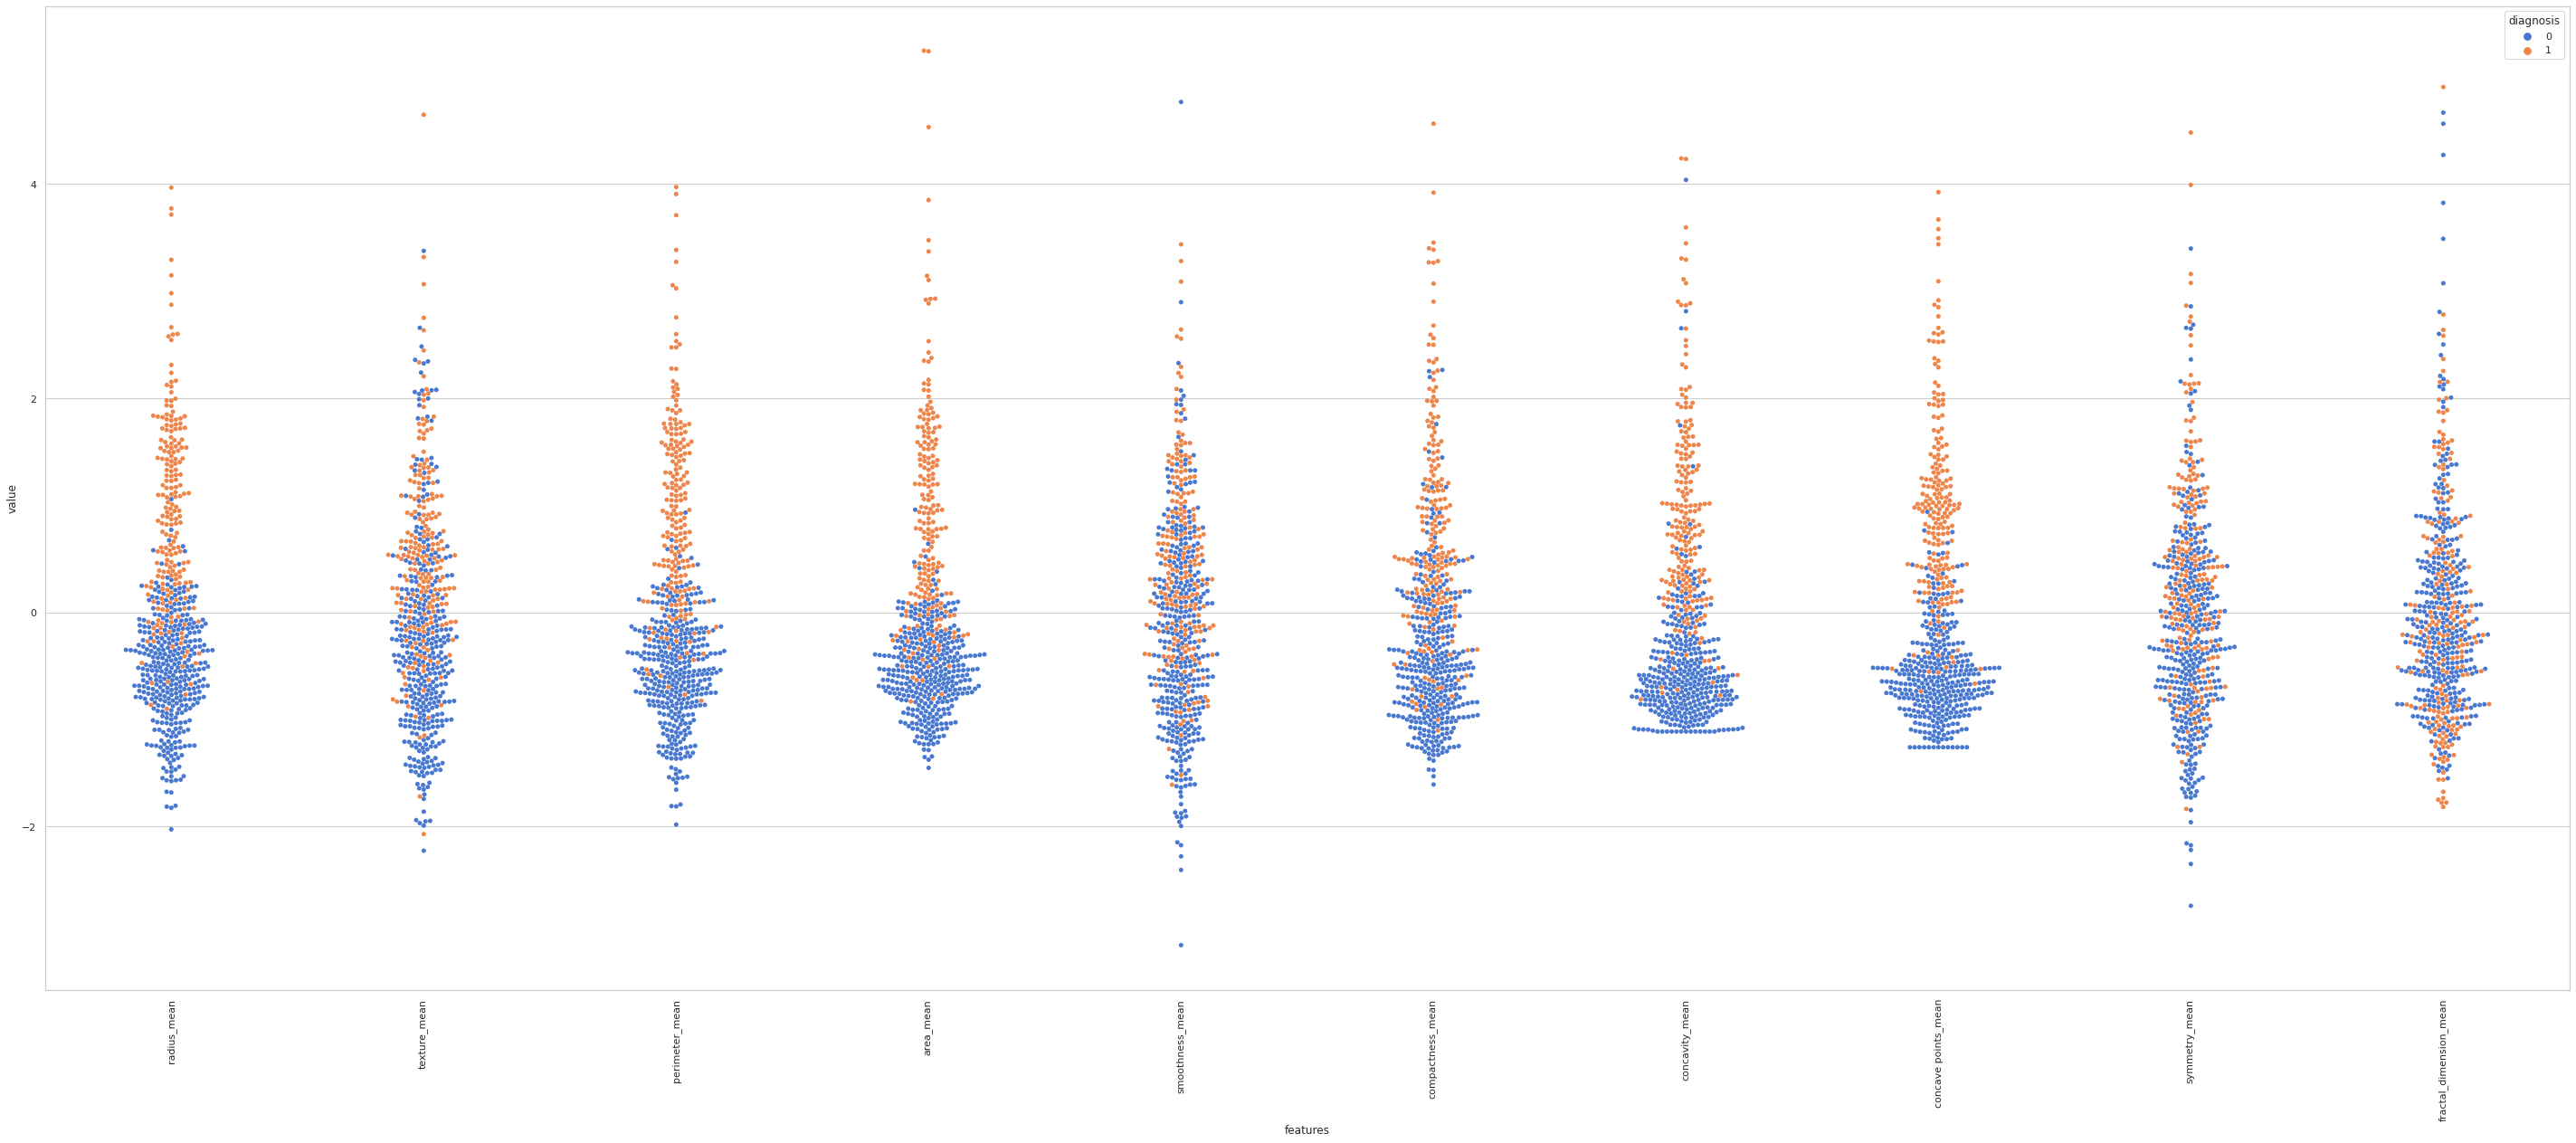

In [ ]:
sns.set(style="whitegrid", palette="muted")
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(50,20))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90);

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 12.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


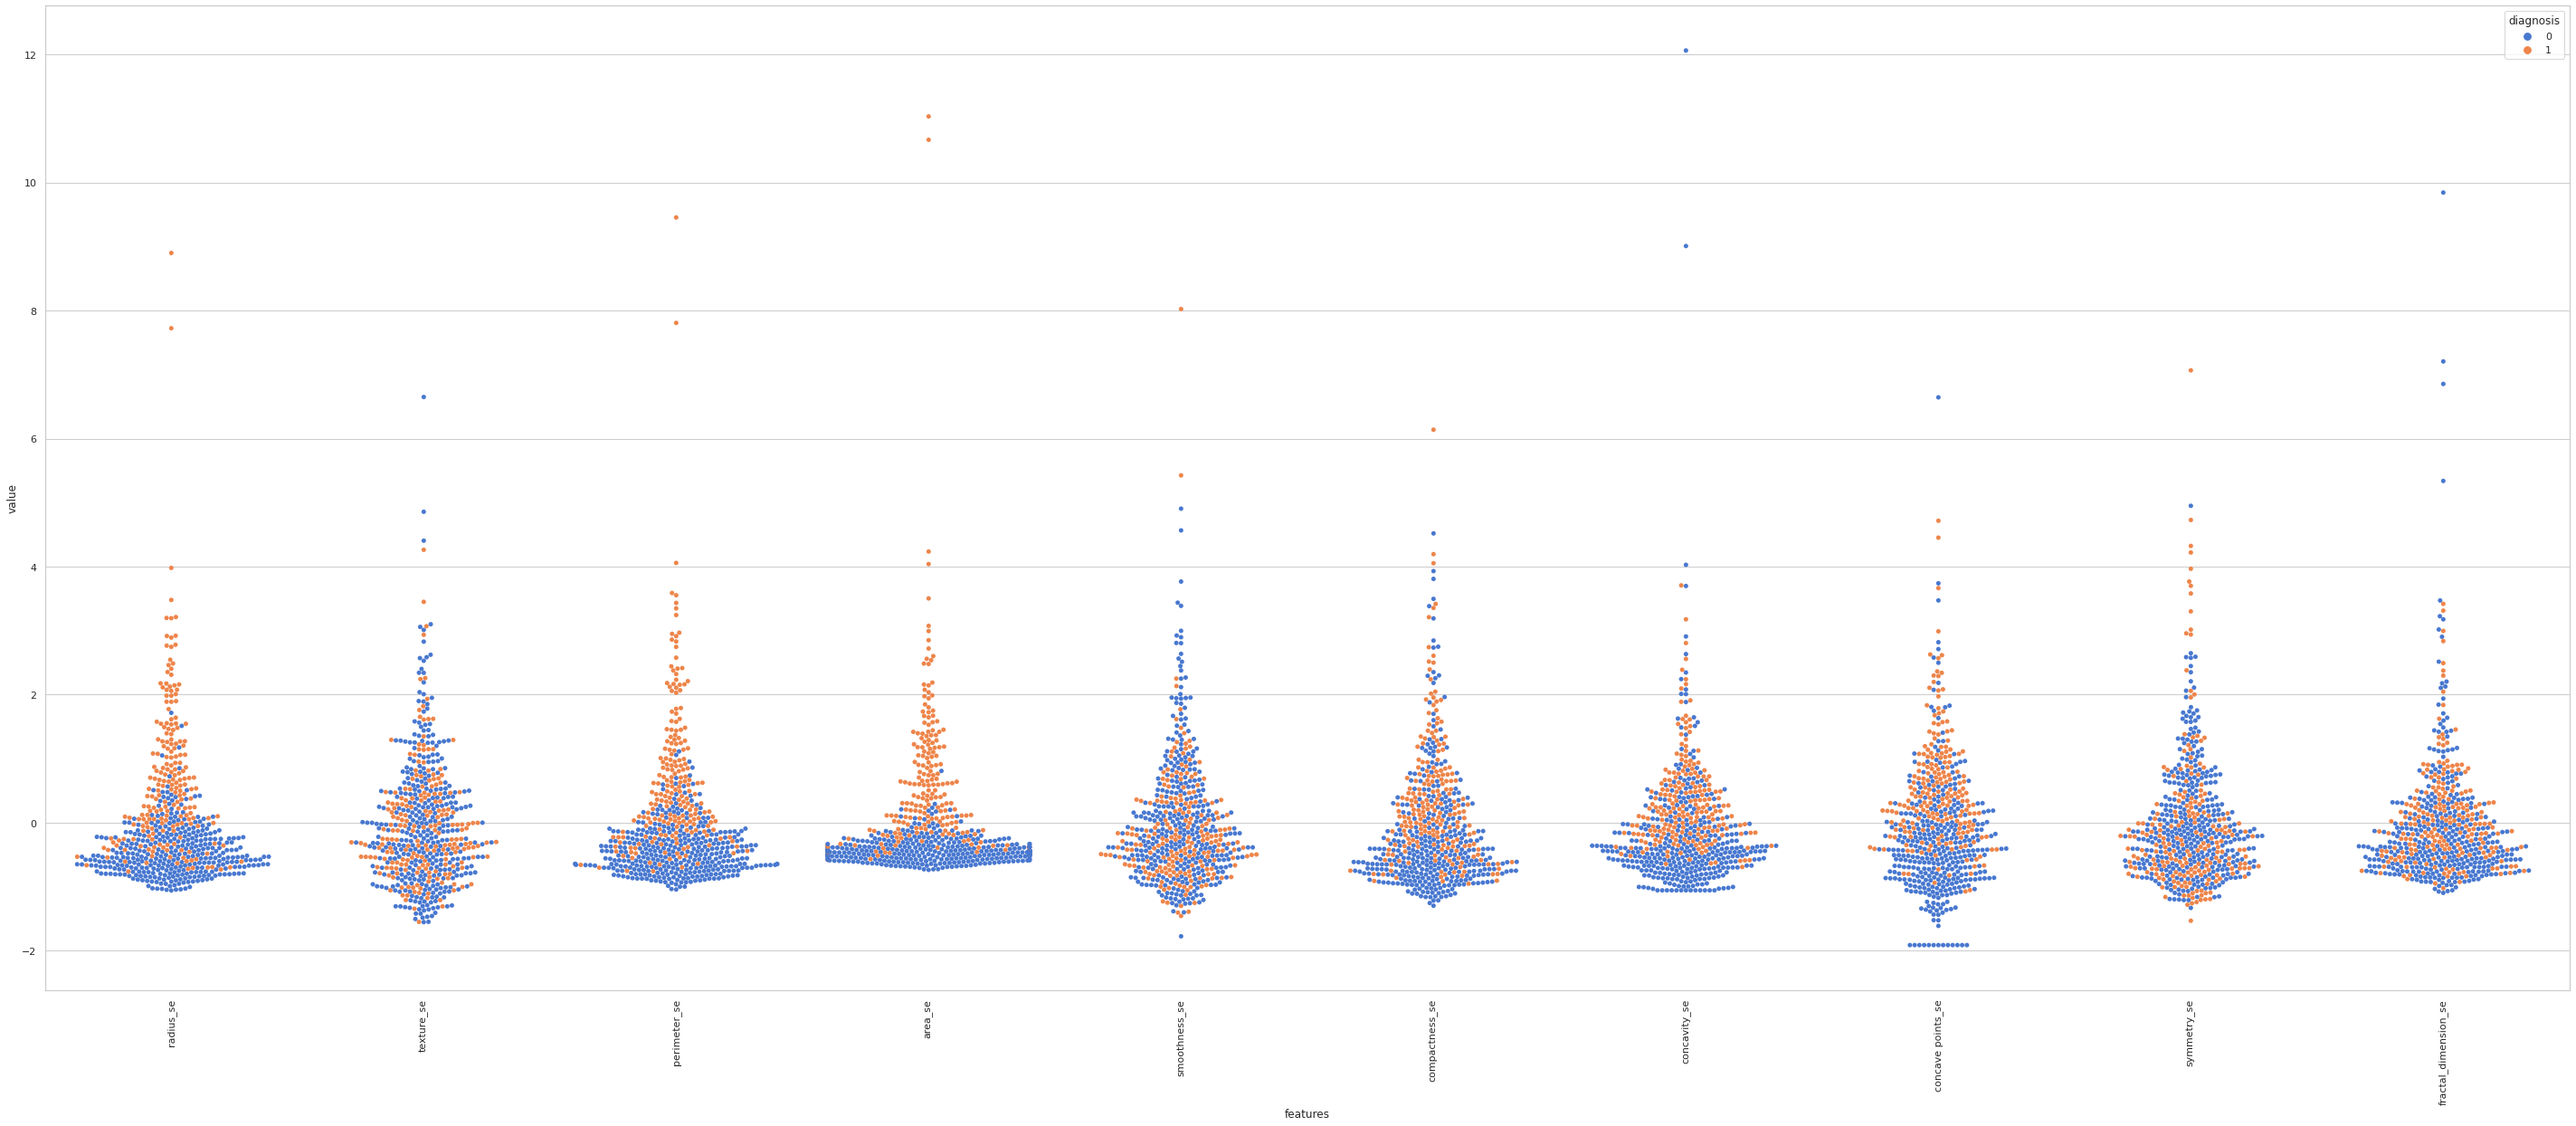

In [ ]:
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(50,20))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90);

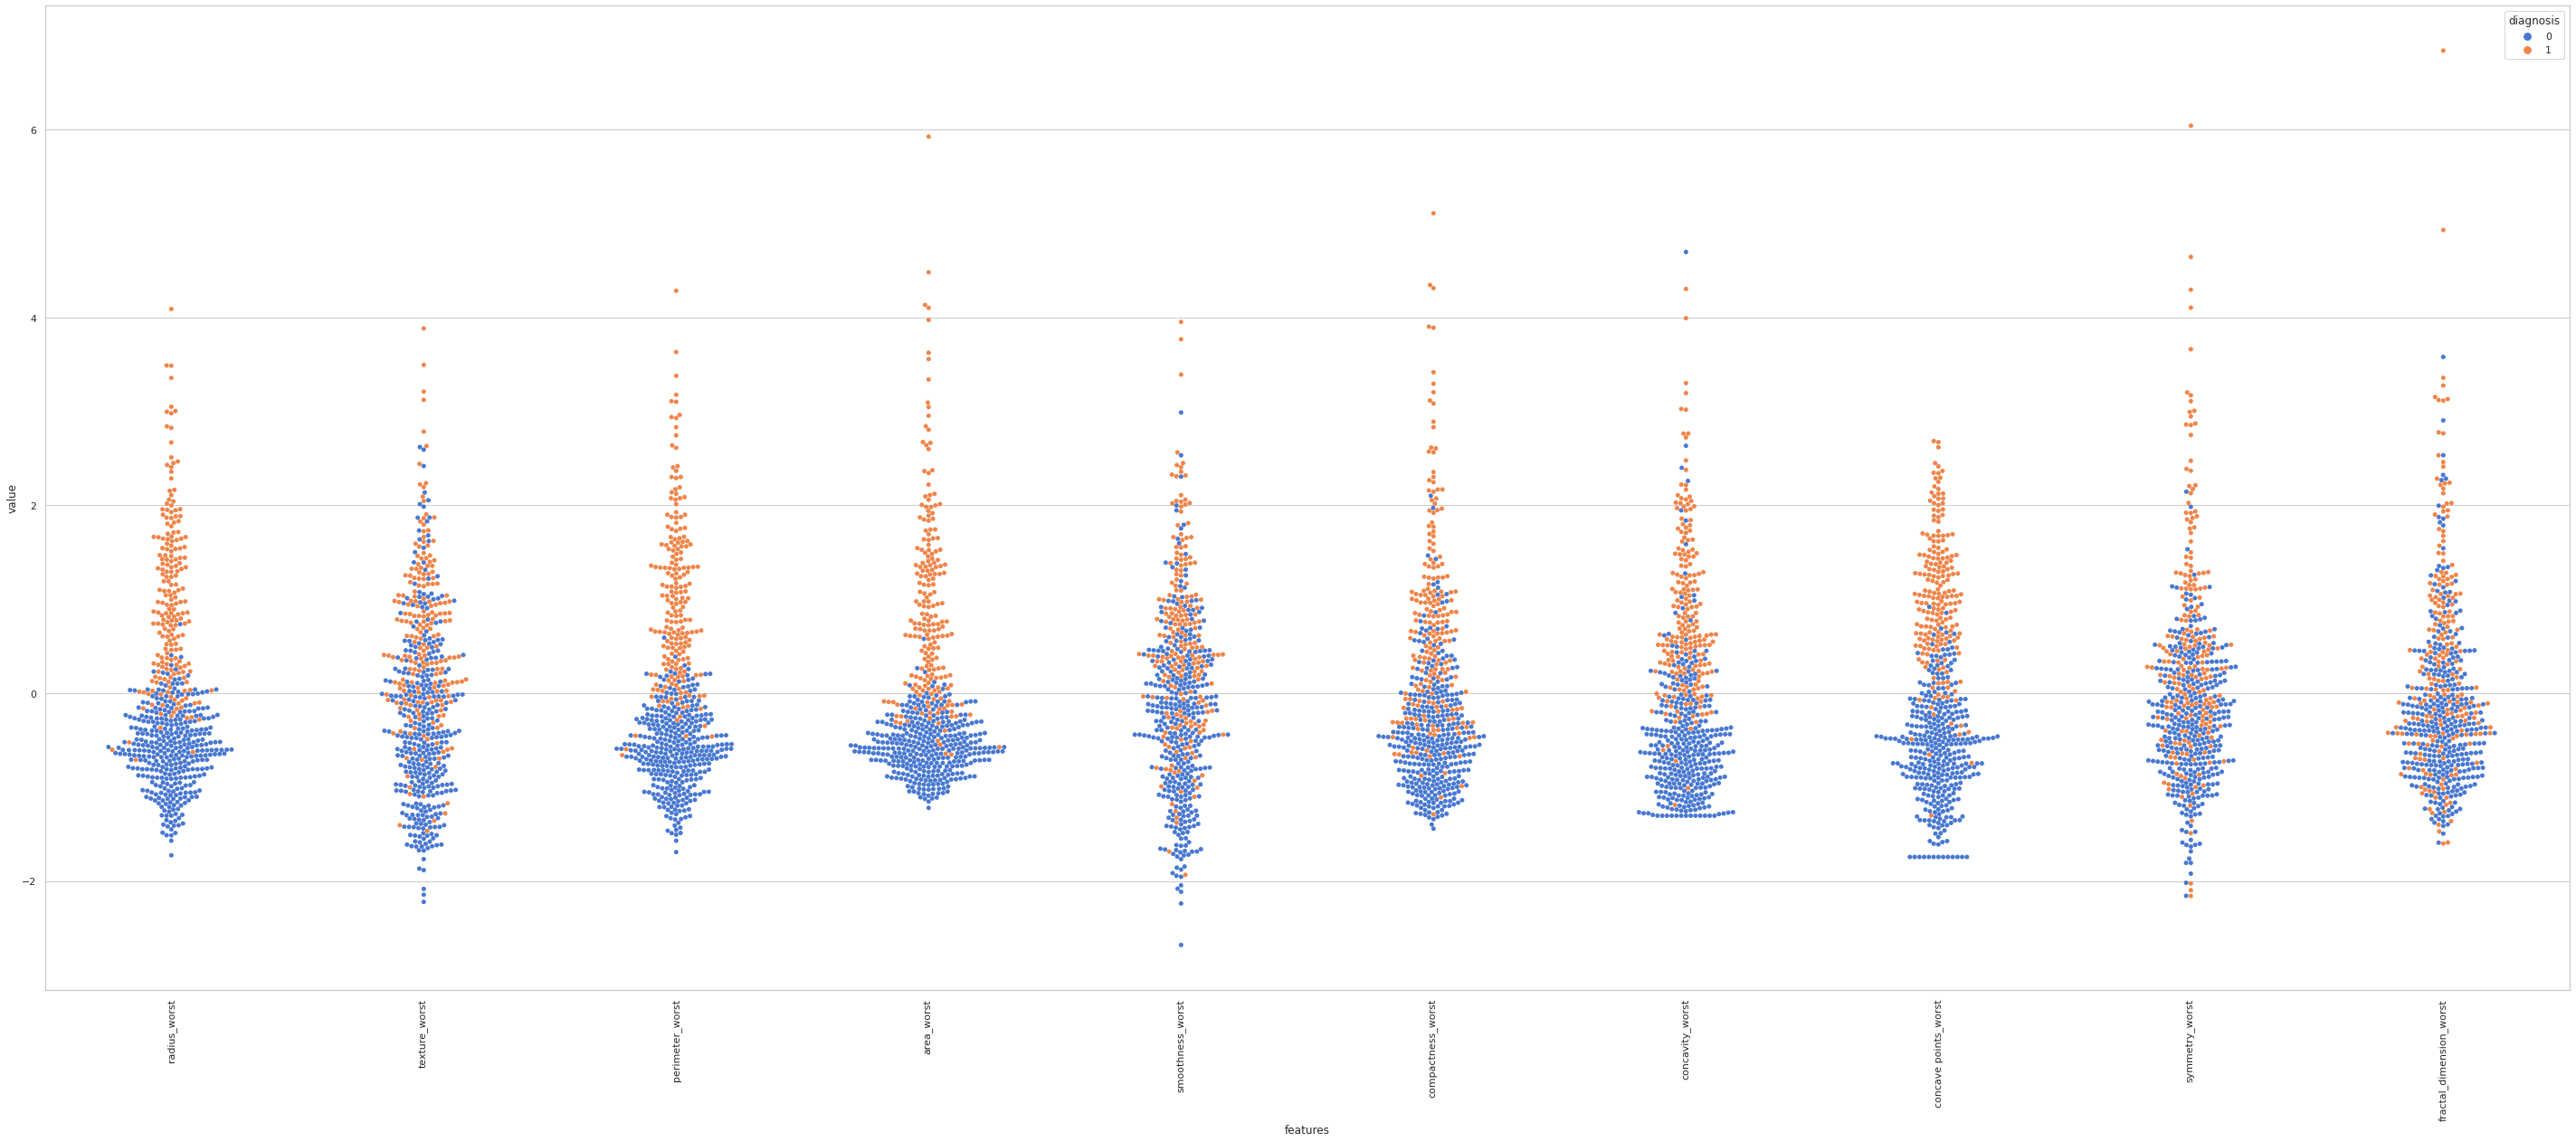

In [ ]:
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(50,20))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90);

### Observing all Pair-wise Correlations

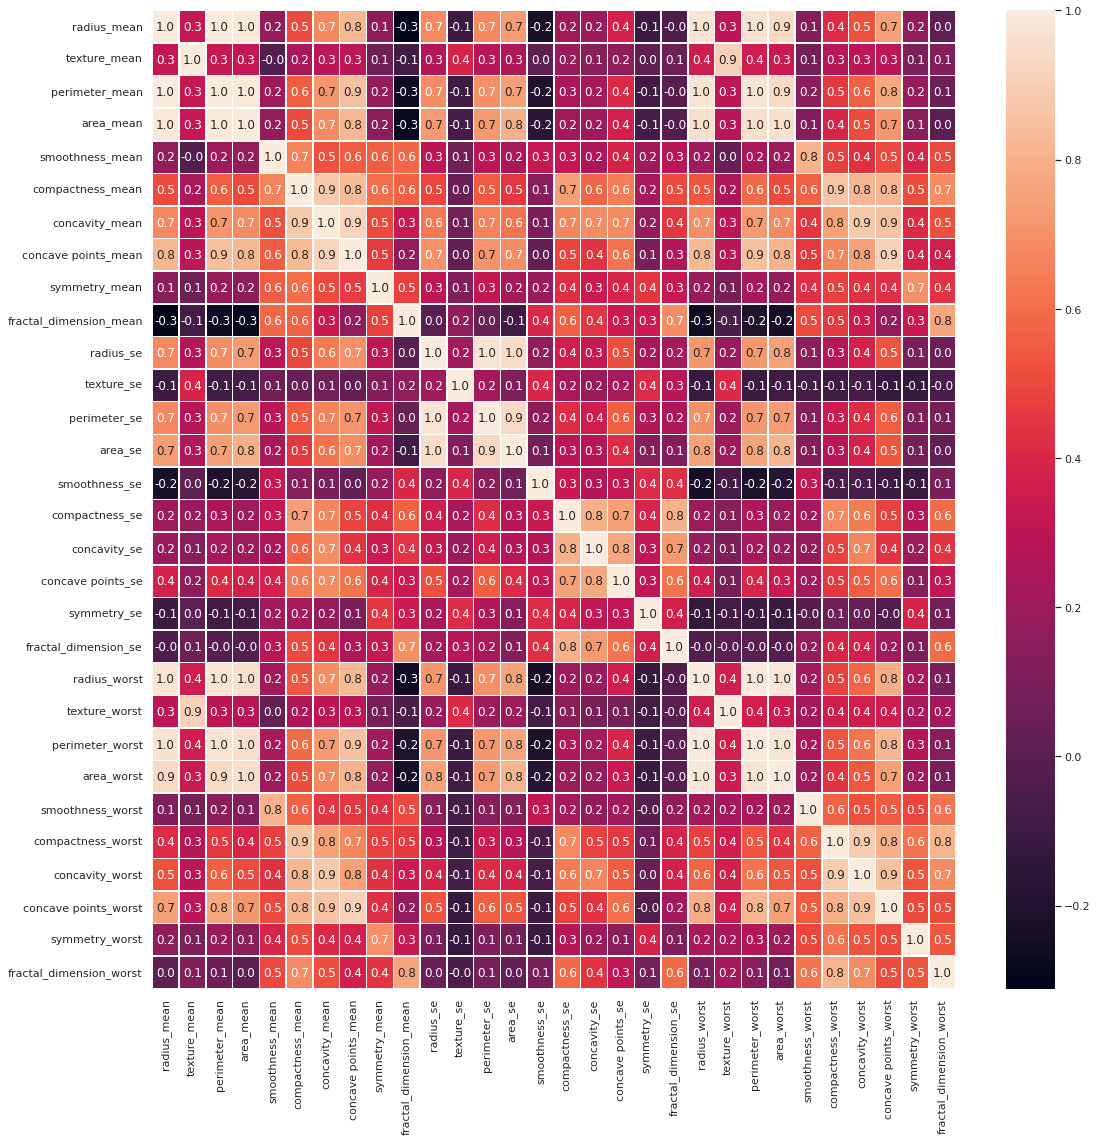

In [ ]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax);

### Dropping Correlated Columns from Feature Matrix

In [ ]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean',
              'concave points_mean','radius_se','perimeter_se',
              'radius_worst','perimeter_worst','compactness_worst',
              'concave points_worst','compactness_se','concave points_se',
              'texture_worst','area_worst']
x_1 = x.drop(drop_list1,axis = 1 )        # do not modify x, we will use it later 
x_1.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


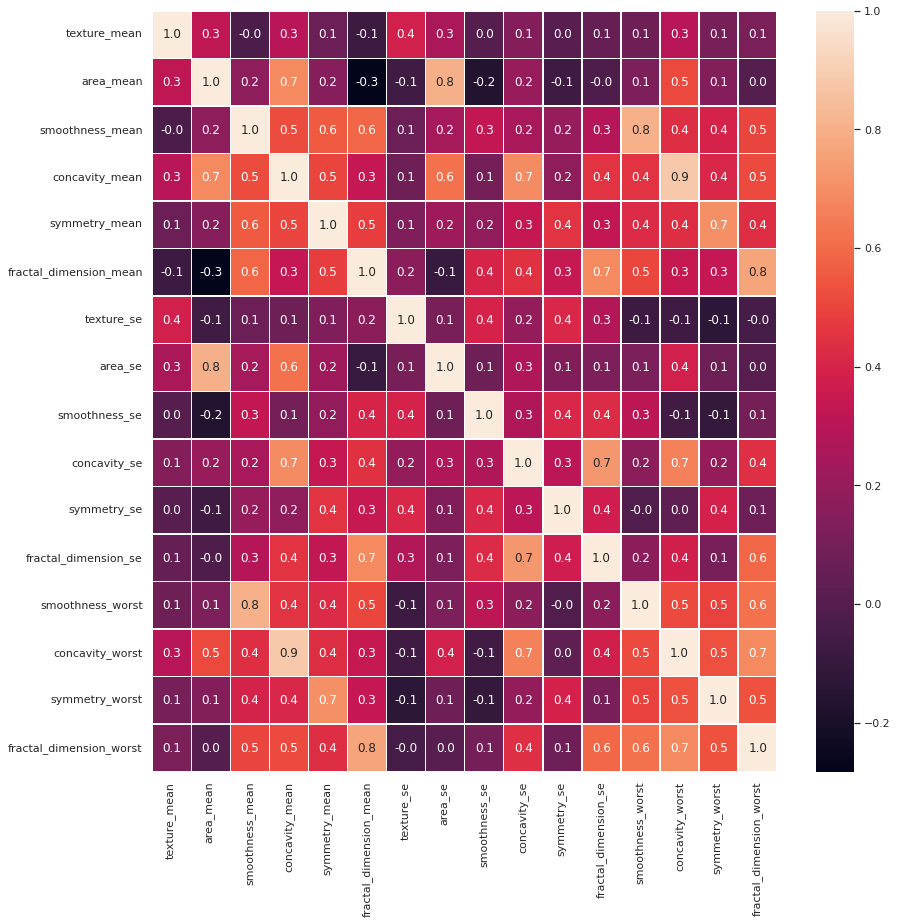

In [ ]:
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(x_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax);

In [ ]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xw= scaler.fit_transform(x)
x1 = scaler.fit_transform(x_1)

In [ ]:
# Confusion matrix 
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix"',
                          cmap = plt.cm.Blues) :
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Show metrics 
def show_metrics():
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    print('Accuracy  =     {:.3f}'.format((tp+tn)/(tp+tn+fp+fn)))
    print('Precision =     {:.3f}'.format(tp/(tp+fp)))
    print('Recall    =     {:.3f}'.format(tp/(tp+fn)))
    print('F1_score  =     {:.3f}'.format(2*(((tp/(tp+fp))*(tp/(tp+fn)))/
                                                 ((tp/(tp+fp))+(tp/(tp+fn))))))

### Classification using XGBoost (minimal feature selection)

Accuracy is:  0.9649122807017544


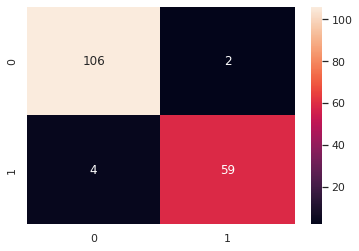

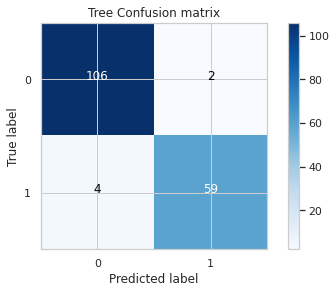

Accuracy  =     0.965
Precision =     0.967
Recall    =     0.937
F1_score  =     0.952
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       108
           1       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

ROC AUC score: 1.00


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Average accuracy:  0.9543393882937432
Standard Deviation:  0.031059011562434756


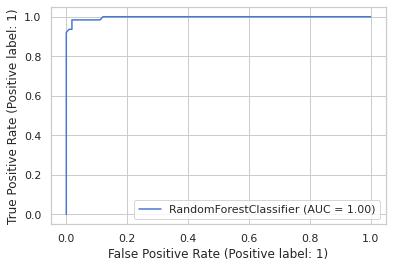

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(xw, y, test_size=0.3, random_state=42)

clf_rf = RandomForestClassifier()      
clr_rf = clf_rf.fit(x_train,y_train)
y_pred = clf_rf.predict(x_test)
ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d");

# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes=class_names, 
                      title='Tree Confusion matrix')
plt.savefig('3')
plt.show()

show_metrics()

print(classification_report(y_test, y_pred))

# Predict the test set probabilities of positive class
y_pred_proba = clf_rf.predict_proba(x_test)[:,1]
# Evaluate test-set roc_auc_score
adb_clf_roc_auc_score = roc_auc_score(y_test, y_pred_proba)
print('ROC AUC score: {:.2f}'.format(adb_clf_roc_auc_score))

plot_roc_curve(clf_rf, x_test, y_test)


#importing the K fold
from sklearn.model_selection import KFold
num_folds = 5
kfold = KFold(n_splits=num_folds, random_state=None)
results_clf = cross_val_score(clf_rf,xw, y, cv=kfold)
accuracy_clf=np.mean(abs(results_clf))
print('Average accuracy: ',accuracy_clf)
print('Standard Deviation: ',results_clf.std())

Accuracy is:  0.9649122807017544


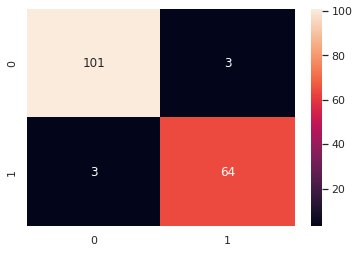

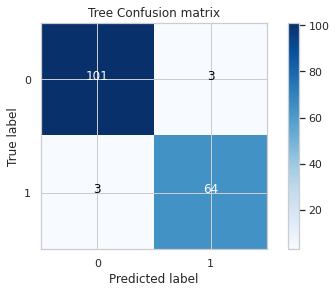

Accuracy  =     0.965
Precision =     0.955
Recall    =     0.955
F1_score  =     0.955
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       104
           1       0.96      0.96      0.96        67

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

ROC AUC score: 0.99


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Average accuracy:  0.9543238627542306
Standard Deviation:  0.027937197815533974


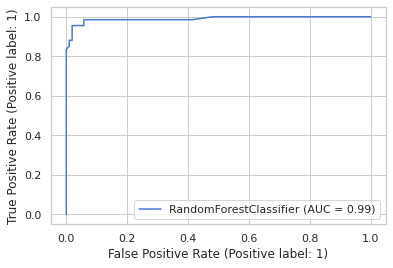

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.3, random_state=2)

clf_rf1 = RandomForestClassifier()      
clr_rf1 = clf_rf1.fit(x_train,y_train)
y_pred1 = clf_rf1.predict(x_test)

ac = accuracy_score(y_test,clf_rf1.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf1.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d");

# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred1)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes=class_names, 
                      title='Tree Confusion matrix')
plt.savefig('3')
plt.show()

show_metrics()

print(classification_report(y_test, y_pred1))

# Predict the test set probabilities of positive class
y_pred_proba1 = clf_rf1.predict_proba(x_test)[:,1]
# Evaluate test-set roc_auc_score
adb_clf_roc_auc_score = roc_auc_score(y_test, y_pred_proba1)
print('ROC AUC score: {:.2f}'.format(adb_clf_roc_auc_score))

plot_roc_curve(clf_rf1, x_test, y_test)


#importing the K fold
from sklearn.model_selection import KFold
num_folds = 5
kfold = KFold(n_splits=num_folds, random_state=None)
results_clf1 = cross_val_score(clf_rf1,x1, y, cv=kfold)
accuracy_clf1=np.mean(abs(results_clf1))
print('Average accuracy: ',accuracy_clf1)
print('Standard Deviation: ',results_clf1.std())


Accuracy is:  0.9181286549707602


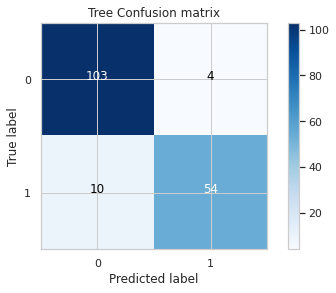

Accuracy  =     0.918
Precision =     0.931
Recall    =     0.844
F1_score  =     0.885
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       107
           1       0.93      0.84      0.89        64

    accuracy                           0.92       171
   macro avg       0.92      0.90      0.91       171
weighted avg       0.92      0.92      0.92       171

ROC AUC score: 0.92
Average accuracy:  0.9262226362366093
Standard Deviation:  0.0394146514149896


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


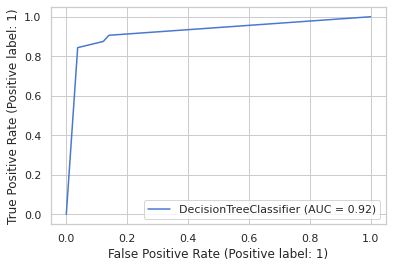

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(xw, y, test_size=0.3, random_state=12)

clf_dt1 = DecisionTreeClassifier(criterion="entropy",max_depth=3) 
clr_dt1 = clf_dt1.fit(x_train,y_train)
prediction_entropy=clf_dt1.predict(x_test)
ac = accuracy_score(y_test,clf_dt1.predict(x_test))
print('Accuracy is: ',ac)

# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, prediction_entropy)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes=class_names, 
                      title='Tree Confusion matrix')
plt.savefig('3')
plt.show()


show_metrics()


print(classification_report(y_test,prediction_entropy))

# Predict the test set probabilities of positive class
y_pred_proba = clf_dt1.predict_proba(x_test)[:,1]
# Evaluate test-set roc_auc_score
adb_clf_roc_auc_score = roc_auc_score(y_test, y_pred_proba)
print('ROC AUC score: {:.2f}'.format(adb_clf_roc_auc_score))

plot_roc_curve(clf_dt1, x_test, y_test)


#importing the K fold
from sklearn.model_selection import KFold
num_folds = 5
kfold = KFold(n_splits=num_folds, random_state=None)
results_clf1 = cross_val_score(clf_dt1,xw, y, cv=kfold)
accuracy_clf1=np.mean(abs(results_clf1))
print('Average accuracy: ',accuracy_clf1)
print('Standard Deviation: ',results_clf1.std())


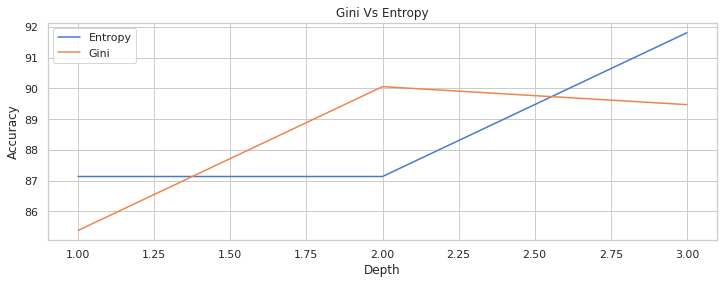

In [ ]:
y_entropy = []
y_gini = []
for depth in range(len(data.columns)):
    classifier_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=depth+1)
    classifier_gini = DecisionTreeClassifier(criterion='gini', max_depth=depth+1)
    classifier_entropy.fit(x_train, y_train)
    classifier_gini.fit(x_train, y_train)
    y_entropy.append(classifier_entropy.score(x_test, y_test)*100)
    y_gini.append(classifier_gini.score(x_test, y_test)*100)
    
# print(classifier.tree_)
plt.figure(figsize=(12,4))
plt.plot(range(1, len(data.columns)+1), y_entropy)
plt.plot(range(1, len(data.columns)+1), y_gini)
plt.title('Gini Vs Entropy')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend(['Entropy', 'Gini'])
plt.show()

Accuracy is:  0.9298245614035088


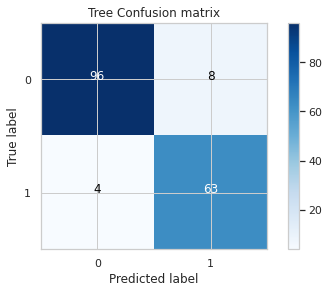

Accuracy  =     0.930
Precision =     0.887
Recall    =     0.940
F1_score  =     0.913
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       104
           1       0.89      0.94      0.91        67

    accuracy                           0.93       171
   macro avg       0.92      0.93      0.93       171
weighted avg       0.93      0.93      0.93       171

ROC AUC score: 0.94
Average accuracy:  0.9138487812451481
Standard Deviation:  0.0335808626758941


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


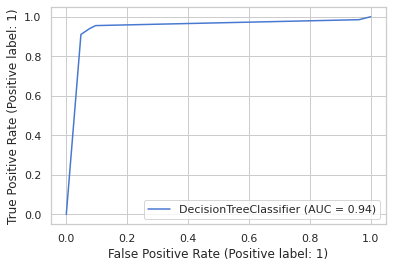

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(xw, y, test_size=0.3, random_state=2)

clf_dt2 = DecisionTreeClassifier(criterion="gini",max_depth=3) 
clr_dt2 = clf_dt2.fit(x_train,y_train)
prediction_gini=clf_dt2.predict(x_test)
ac = accuracy_score(y_test,clf_dt2.predict(x_test))
print('Accuracy is: ',ac)

# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, prediction_gini)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes=class_names, 
                      title='Tree Confusion matrix')
plt.savefig('3')
plt.show()


show_metrics()


print(classification_report(y_test,prediction_gini))

# Predict the test set probabilities of positive class
y_pred_proba = clf_dt2.predict_proba(x_test)[:,1]
# Evaluate test-set roc_auc_score
adb_clf_roc_auc_score = roc_auc_score(y_test, y_pred_proba)
print('ROC AUC score: {:.2f}'.format(adb_clf_roc_auc_score))

plot_roc_curve(clf_dt2, x_test, y_test)


#importing the K fold
from sklearn.model_selection import KFold
num_folds = 5
kfold = KFold(n_splits=num_folds, random_state=None)
results_clf2 = cross_val_score(clf_dt2,xw, y, cv=kfold)
accuracy_clf2=np.mean(abs(results_clf2))
print('Average accuracy: ',accuracy_clf2)
print('Standard Deviation: ',results_clf2.std())




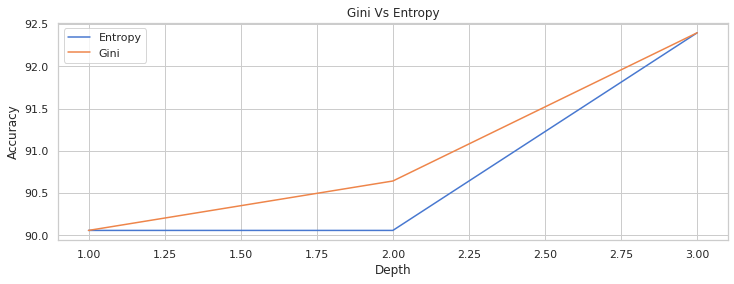

In [ ]:
y_entropy = []
y_gini = []
for depth in range(len(data.columns)):
    classifier_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=depth+1)
    classifier_gini = DecisionTreeClassifier(criterion='gini', max_depth=depth+1)
    classifier_entropy.fit(x_train, y_train)
    classifier_gini.fit(x_train, y_train)
    y_entropy.append(classifier_entropy.score(x_test, y_test)*100)
    y_gini.append(classifier_gini.score(x_test, y_test)*100)
    
# print(classifier.tree_)
plt.figure(figsize=(12,4))
plt.plot(range(1, len(data.columns)+1), y_entropy)
plt.plot(range(1, len(data.columns)+1), y_gini)
plt.title('Gini Vs Entropy')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend(['Entropy', 'Gini'])
plt.show()

In [ ]:
best_accuracy = np.amax(y_entropy), np.amax(y_gini)
best_criterion = ['Entropy', 'Gini']

print('Best Criterion: {}, Accuracy {:.2f}% at depth = {}'.format(best_criterion[np.argmax(best_accuracy)], 
                                                                  np.amax(best_accuracy), 
                                                                  np.argmax(y_gini)+1 if np.amax(y_gini) > np.amax(y_entropy) else np.argmax(y_entropy)+1))

Best Criterion: Entropy, Accuracy 92.40% at depth = 3


In [ ]:
!pip install pydotplus

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

In [ ]:
feature_cols = ["radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst",]


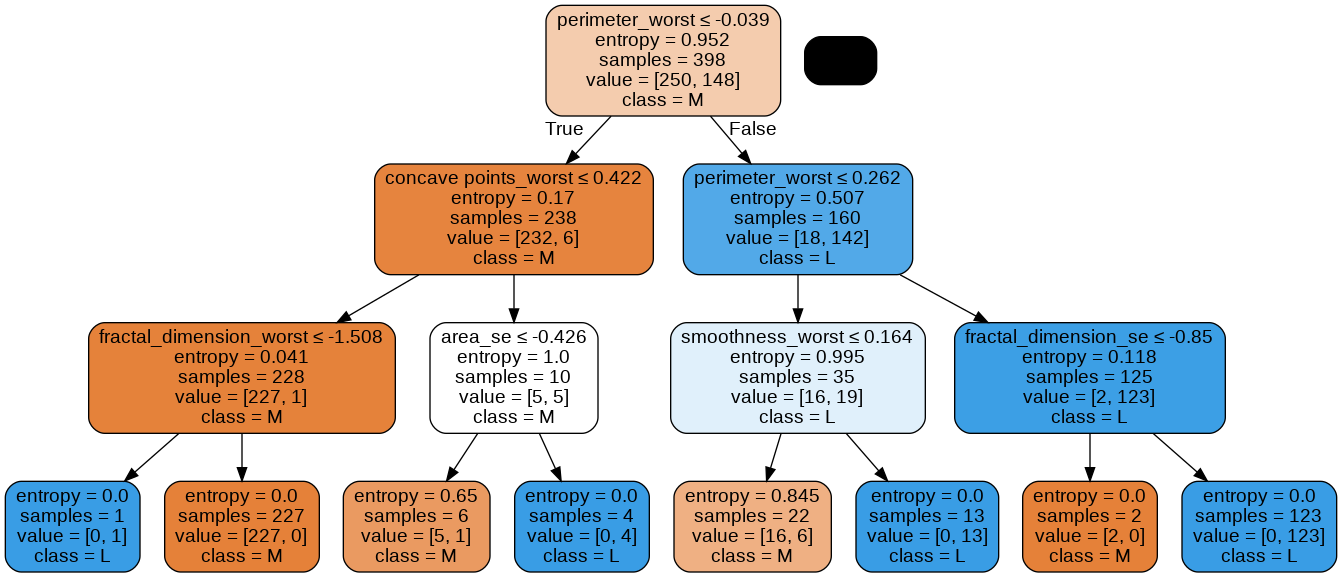

In [ ]:
dot_data = StringIO()
export_graphviz(clf_dt1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['M','L'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('entropy.png')
Image(graph.create_png())

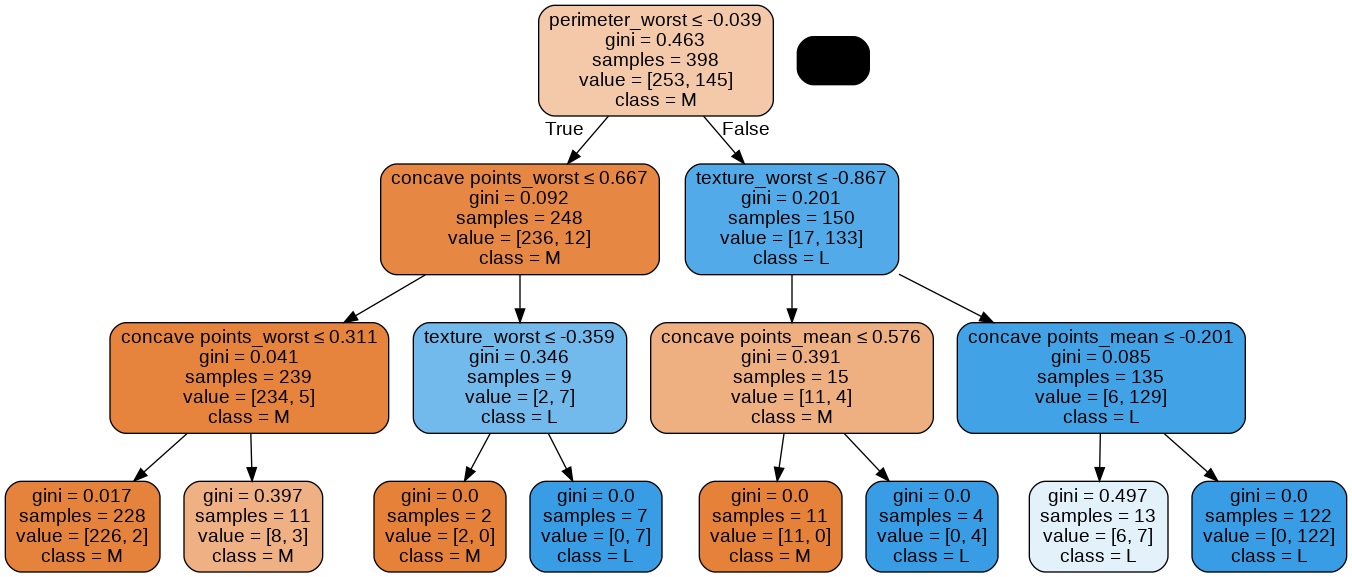

In [ ]:
dot_data = StringIO()
export_graphviz(clf_dt2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['M','L'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('entropy.png')
Image(graph.create_png())